In [24]:
import tensorflow as tf
import numpy as np
def load_and_preprocess_data():
    # Load MNIST dataset
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    
    # Normalize pixel values
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    
    # Reshape images to 1D arrays
    x_train = x_train.reshape(-1, 28*28)
    x_test = x_test.reshape(-1, 28*28)
    
    # One-hot encode labels
    y_train = tf.keras.utils.to_categorical(y_train, 10)
    y_test = tf.keras.utils.to_categorical(y_test, 10)
    
    return (x_train, y_train), (x_test, y_test)

(xtrain, ytrain), (xtest, ytest) = load_and_preprocess_data()


In [25]:
ytrain.shape
ytrain[1000]
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    
    return model
model = create_model()


In [26]:
from tensorflow.keras.utils import plot_model

(x_train, y_train), (x_test, y_test) = load_and_preprocess_data()

model = create_model()


# plot_model(
#     model,
#     to_file="model.png",
#     show_shapes=True,
#     show_layer_names=True,
#     rankdir="TB",
#     expand_nested=False,
#     dpi=96)


# from IPython.display import Image
# Image('model.png')

def train(model, x_train, y_train, x_test, y_test):
    # Train the model
    history = model.fit(x_train, y_train,
                       batch_size=128,
                       epochs=20,
                       validation_split=0.2,
                       verbose=1)
    return history
model_history = train(model, xtrain,ytrain,xtest, ytest)


Epoch 1/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3315 - accuracy: 0.8988 - val_loss: 0.1297 - val_accuracy: 0.9608
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 0.1378 - accuracy: 0.9578 - val_loss: 0.0982 - val_accuracy: 0.9700
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0942 - accuracy: 0.9708 - val_loss: 0.0888 - val_accuracy: 0.9738
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0749 - accuracy: 0.9777 - val_loss: 0.0855 - val_accuracy: 0.9743
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0627 - accuracy: 0.9810 - val_loss: 0.0771 - val_accuracy: 0.9768
Epoch 6/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0539 - accuracy: 0.9835 - val_loss: 0.0805 - val_accuracy: 0.9772
Epoch 7/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0424 - accuracy: 0.9866 - val_loss: 0.0999 - val_accuracy: 0.9741
Epoch 

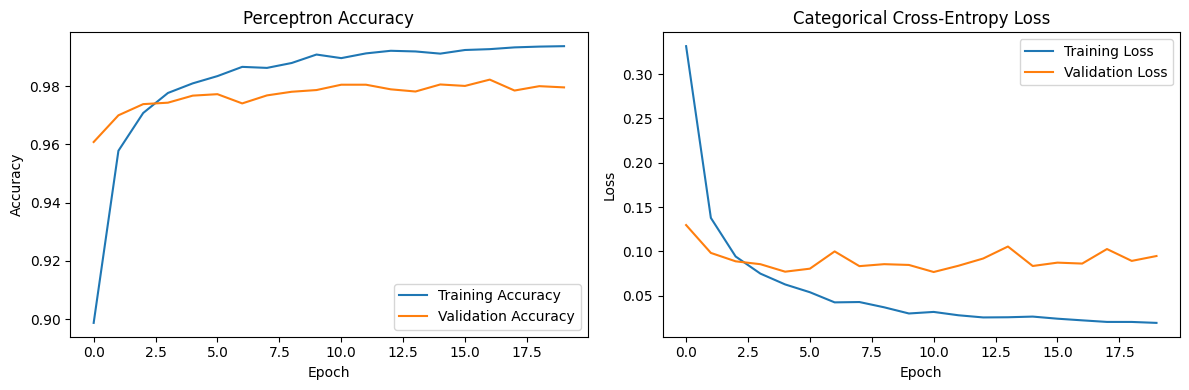

In [27]:
import matplotlib.pyplot as plt
def plot_training_history(history): 
    plt.figure(figsize=(12, 4)) 
    # Plot accuracy 
    plt.subplot(1, 2, 1) 
    plt.plot(history.history['accuracy'], label='Training Accuracy') 
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy') 
    plt.title('Perceptron Accuracy') 
    plt.xlabel('Epoch') 
    plt.ylabel('Accuracy') 
    plt.legend() 
    # Plot loss 
    plt.subplot(1, 2, 2) 
    plt.plot(history.history['loss'], label='Training Loss') 
    plt.plot(history.history['val_loss'], label='Validation Loss') 
    plt.title('Categorical Cross-Entropy Loss') 
    plt.xlabel('Epoch') 
    plt.ylabel('Loss') 
    plt.legend() 
    plt.tight_layout() 
    plt.show() 
plot_training_history(model_history)


In [28]:
# Predict probabilities
ypred = model.predict(x_test)

# Convert probabilities to class labels
ypred_classes = np.argmax(ypred, axis=1)

# Convert one-hot encoded labels to class labels
ytest_classes = np.argmax(ytest, axis=1)

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(ytest_classes, ypred_classes))

313/313 [==============================] - 0s 874us/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



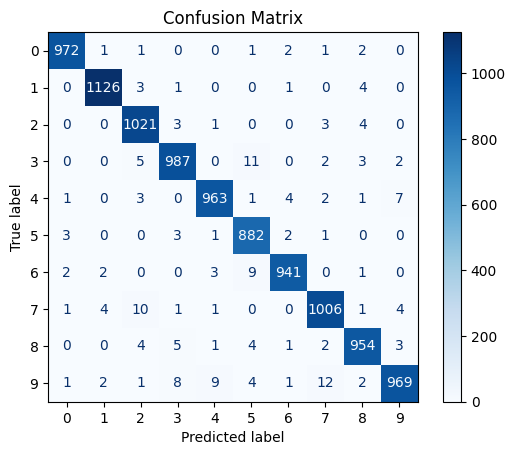

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(ytest_classes, ypred_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()